In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [2]:
corpus_root = "/Users/jianny/AI_practice/document_cluster/sentence_tokenized"
GNICorpus = PlaintextCorpusReader(corpus_root, '.*\.txt', encoding='utf-8')

In [3]:
file10 = PlaintextCorpusReader(corpus_root, 'gni-10.*\\.txt', encoding='utf-8')
file11 = PlaintextCorpusReader(corpus_root, 'gni-11.*\\.txt', encoding='utf-8')
file12 = PlaintextCorpusReader(corpus_root, 'gni-12.*\\.txt', encoding='utf-8')
file13 = PlaintextCorpusReader(corpus_root, 'gni-13.*\\.txt', encoding='utf-8')
file14 = PlaintextCorpusReader(corpus_root, 'gni-14.*\\.txt', encoding='utf-8')
file15 = PlaintextCorpusReader(corpus_root, 'gni-15.*\\.txt', encoding='utf-8')
file16 = PlaintextCorpusReader(corpus_root, 'gni-16.*\\.txt', encoding='utf-8')
file17 = PlaintextCorpusReader(corpus_root, 'gni-17.*\\.txt', encoding='utf-8')

gni_List1 = [file10,file11,file12,file13,file14,file15,file16,file17]

In [4]:
gni_title = open('gni_list.txt',mode='w',encoding='utf-8')

In [5]:
for i in range(len(gni_List1)):
    fileid = gni_List1[i].fileids()
    for j in range(len(fileid)):
        gni_title.write(fileid[j])
        gni_title.write('\n')
gni_title.close()

In [6]:
titles = open('gni_list.txt').read().split('\n')
titles1 = titles[:150]
titles2 = titles[150:]

print('first : ',len(titles))
print('second : ',len(titles1))
print('third : ',len(titles2))

first :  302
second :  150
third :  152


In [7]:
vol_1 = [fileid[4:8]
        for fileName in gni_List1
        for fileid in fileName.fileids()]

vol_list = open('vol_list.txt', 'w') 

for item in vol_1:
    vol_list.write("%s\n" % item)

vol_list.close()

vol = open('vol_list.txt').read().split('\n')
vol1 = vol[:150]
vol2 = vol[150:]

In [8]:
gni_clean_text = []
gni_clean_text1 = []
gni_clean_text2 = []

gni_file_list = []
# titles[:150]
for fileName in gni_List1:
    for fileid in fileName.fileids():
        gni_file_list.append(fileid)

for fileid in gni_file_list:
    gni_clean_text.append(GNICorpus.raw(fileid))

print(gni_file_list[0])
for fileid in gni_file_list[:150]:
    gni_clean_text1.append(GNICorpus.raw(fileid))
    
for fileid in gni_file_list[150:]:
    gni_clean_text2.append(GNICorpus.raw(fileid))

gni-10-1-1.txt


In [9]:
gni_text = open('gni_text.txt', 'w') 
gni_text1 = open('gni_text1.txt', 'w') 
gni_text2 = open('gni_text2.txt', 'w')

for item in gni_clean_text:
    gni_text.write("%s\n BREAKS HERE" % item)
    
for item in gni_clean_text1:
    gni_text1.write("%s\n BREAKS HERE" % item)
    
for item in gni_clean_text2:
    gni_text2.write("%s\n BREAKS HERE" % item)

gni_text.close()
gni_text1.close()
gni_text2.close()

In [10]:
gni_text = open('gni_text.txt').read().split('\n BREAKS HERE')
gni_text1 = open('gni_text1.txt').read().split('\n BREAKS HERE')
gni_text2 = open('gni_text2.txt').read().split('\n BREAKS HERE')
len(gni_text)

302

In [11]:
# gni_text = gni_text
gni_text1 = gni_text1[:150]
gni_text2 = gni_text2[:152]

In [12]:
print('first')
print(str(len(titles)) + ' titles')
print(str(len(vol)) + ' volume')
print(str(len(gni_text)) + ' gni_text')
print()

print('second')
print(str(len(titles1)) + ' titles')
print(str(len(vol1)) + ' volume')
print(str(len(gni_text1)) + ' gni_text')

print()

print('third')
print(str(len(titles2)) + ' titles')
print(str(len(vol2)) + ' volume')
print(str(len(gni_text2)) + ' gni_text')

first
302 titles
302 volume
302 gni_text

second
150 titles
150 volume
150 gni_text

third
152 titles
152 volume
152 gni_text


In [13]:
ranks = [] 
ranks1 = []
ranks2 = []

for i in range(0,len(titles)):
    ranks.append(i)
    
for i in range(0,len(titles1)):
    ranks1.append(i)
    
for i in range(0,len(titles2)):
    ranks2.append(i)

In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
from nltk.stem import WordNetLemmatizer

wordLemma = WordNetLemmatizer()

In [16]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [wordLemma.lemmatize(t) for t in filtered_tokens]
    return stems

In [17]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [18]:
totalvocab_stemmed = []
totalvocab_tokenized = []

totalvocab_stemmed1 = []
totalvocab_stemmed2 = []

totalvocab_tokenized1 = []
totalvocab_tokenized2 = []

for i in gni_text:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

for i in gni_text1:
    allwords_stemmed1 = tokenize_and_stem(i)
    totalvocab_stemmed1.extend(allwords_stemmed1)
    
    allwords_tokenized1 = tokenize_only(i)
    totalvocab_tokenized1.extend(allwords_tokenized1)
    
for i in gni_text2:
    allwords_stemmed2 = tokenize_and_stem(i)
    totalvocab_stemmed2.extend(allwords_stemmed2)
    
    allwords_tokenized2 = tokenize_only(i)
    totalvocab_tokenized2.extend(allwords_tokenized2)

In [19]:
print('* first *')
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])
print()
print('* second *')
print(totalvocab_tokenized1[:20])
print(totalvocab_stemmed1[:20])
print()
print('* third *')
print(totalvocab_tokenized2[:20])
print(totalvocab_stemmed2[:20])

* first *
['title', 'survey', 'of', 'the', 'applications', 'of', 'ngs', 'to', 'whole-genome', 'sequencing', 'and', 'expression', 'profiling', 'recently', 'the', 'technologies', 'of', 'dna', 'sequence', 'variation']
['Title', 'Survey', 'of', 'the', 'Applications', 'of', 'NGS', 'to', 'Whole-Genome', 'Sequencing', 'and', 'Expression', 'Profiling', 'Recently', 'the', 'technology', 'of', 'DNA', 'sequence', 'variation']

* second *
['title', 'survey', 'of', 'the', 'applications', 'of', 'ngs', 'to', 'whole-genome', 'sequencing', 'and', 'expression', 'profiling', 'recently', 'the', 'technologies', 'of', 'dna', 'sequence', 'variation']
['Title', 'Survey', 'of', 'the', 'Applications', 'of', 'NGS', 'to', 'Whole-Genome', 'Sequencing', 'and', 'Expression', 'Profiling', 'Recently', 'the', 'technology', 'of', 'DNA', 'sequence', 'variation']

* third *
['title', 'vbioindex', 'a', 'visual', 'tool', 'to', 'estimate', 'biodiversity', 'biological', 'diversity', 'also', 'known', 'as', 'biodiversity', 'is',

In [20]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame1 = pd.DataFrame({'words': totalvocab_tokenized1}, index = totalvocab_stemmed1)
vocab_frame2 = pd.DataFrame({'words': totalvocab_tokenized2}, index = totalvocab_stemmed2)

type(vocab_frame)

pandas.core.frame.DataFrame

In [21]:
vocab_frame.head(20)

,words
Title,title
Survey,survey
of,of
the,the
Applications,applications
of,of
NGS,ngs
to,to
Whole-Genome,whole-genome
Sequencing,sequencing


In [22]:
vocab_frame1.head(20)

,words
Title,title
Survey,survey
of,of
the,the
Applications,applications
of,of
NGS,ngs
to,to
Whole-Genome,whole-genome
Sequencing,sequencing


In [23]:
vocab_frame2.head(20)

,words
Title,title
VBioindex,vbioindex
A,a
Visual,visual
Tool,tool
to,to
Estimate,estimate
Biodiversity,biodiversity
Biological,biological
diversity,diversity


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_vectorizer1 = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(gni_text)
terms = tfidf_vectorizer.get_feature_names()

%time tfidf_matrix1 = tfidf_vectorizer1.fit_transform(gni_text1)
terms1 = tfidf_vectorizer1.get_feature_names()

%time tfidf_matrix2 = tfidf_vectorizer2.fit_transform(gni_text2)
terms2 = tfidf_vectorizer2.get_feature_names()

/Users/jianny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 11.6 s, sys: 130 ms, total: 11.7 s
Wall time: 11.7 s


/Users/jianny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 5.81 s, sys: 51.5 ms, total: 5.86 s
Wall time: 5.88 s


/Users/jianny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 5.6 s, sys: 57.5 ms, total: 5.66 s
Wall time: 5.67 s


In [25]:
print('First : ',tfidf_matrix.shape)
print('Second : ',tfidf_matrix1.shape)
print('Third : ',tfidf_matrix2.shape)

First :  (302, 493)
Second :  (150, 539)
Third :  (152, 487)


In [26]:
# terms1 = tfidf_vectorizer.get_feature_names()

In [27]:
print(len(terms),len(terms1),len(terms2))

493 539 487


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix) #documents 간의 distance를 잴 때 사용
dist1 = 1 - cosine_similarity(tfidf_matrix1) #documents 간의 distance를 잴 때 사용
dist2 = 1 - cosine_similarity(tfidf_matrix2) #documents 간의 distance를 잴 때 사용

In [29]:
from sklearn.cluster import KMeans

num_clusters = 7
num_clusters1 = 5
num_clusters2 = 5

km = KMeans(n_clusters=num_clusters)
km1 = KMeans(n_clusters=num_clusters1)
km2 = KMeans(n_clusters=num_clusters2)

%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

%time km1.fit(tfidf_matrix1)
clusters1 = km1.labels_.tolist()

%time km2.fit(tfidf_matrix2)
clusters2 = km2.labels_.tolist()

CPU times: user 3.38 s, sys: 24.5 ms, total: 3.41 s
Wall time: 3.51 s
CPU times: user 1.9 s, sys: 18.2 ms, total: 1.91 s
Wall time: 2 s
CPU times: user 1.18 s, sys: 13.4 ms, total: 1.19 s
Wall time: 1.24 s


In [30]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'text': gni_text, 'cluster': clusters, 'volume': vol }
films1 = { 'title': titles1, 'rank': ranks1, 'text': gni_text1, 'cluster': clusters1, 'volume': vol1 }
films2 = { 'title': titles2, 'rank': ranks2, 'text': gni_text2, 'cluster': clusters2, 'volume': vol2 }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'volume'])
frame1 = pd.DataFrame(films1, index = [clusters1] , columns = ['rank', 'title', 'cluster', 'volume'])
frame2 = pd.DataFrame(films2, index = [clusters2] , columns = ['rank', 'title', 'cluster', 'volume'])

In [31]:
frame['cluster'].value_counts()

2    76
0    72
1    47
3    30
6    29
5    27
4    21
Name: cluster, dtype: int64

In [32]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    137.208333
1    142.914894
2    176.052632
3    141.033333
4    157.714286
5    132.407407
6    150.241379
Name: rank, dtype: float64

In [33]:
frame1['cluster'].value_counts()

4    37
3    36
0    32
2    27
1    18
Name: cluster, dtype: int64

In [34]:
grouped1 = frame1['rank'].groupby(frame1['cluster'])

grouped1.mean()

cluster
0    68.187500
1    79.055556
2    80.370370
3    76.055556
4    71.945946
Name: rank, dtype: float64

In [35]:
frame2['cluster'].value_counts()

0    39
1    32
4    31
3    30
2    20
Name: cluster, dtype: int64

In [36]:
grouped2 = frame2['rank'].groupby(frame2['cluster'])

grouped2.mean()

cluster
0    80.512821
1    63.125000
2    64.200000
3    78.000000
4    86.838710
Name: rank, dtype: float64

In [37]:
from __future__ import print_function

print("Top terms per cluster of first:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % terms[ind].encode('utf-8','ignore'),end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster of first:

Cluster 0 words: b'snp', b'population', b'association', b'genetic', b'korean', b'genotype',

Cluster 0 titles: gni-10-2-106.txt, gni-10-2-110.txt, gni-10-2-117.txt, gni-10-2-123.txt, gni-10-2-81.txt, gni-10-2-88.txt, gni-10-2-99.txt, gni-10-3-133.txt, gni-10-3-175.txt, gni-10-3-194.txt, gni-10-3-200.txt, gni-10-4-220.txt, gni-10-4-239.txt, gni-10-4-244.txt, gni-10-4-256.txt, gni-11-1-15.txt, gni-11-2-83.txt, gni-11-2-93.txt, gni-11-3-129.txt, gni-11-3-135.txt, gni-11-3-149.txt, gni-11-4-263.txt, gni-12-1-35.txt, gni-12-1-42.txt, gni-12-2-58.txt, gni-12-3-114.txt, gni-12-3-121.txt, gni-12-3-127.txt, gni-12-4-165.txt, gni-12-4-181.txt, gni-12-4-187.txt, gni-12-4-195.txt, gni-12-4-203.txt, gni-12-4-208.txt, gni-12-4-216.txt, gni-12-4-225.txt, gni-12-4-231.txt, gni-12-4-236.txt, gni-12-4-254.txt, gni-13-4-126.txt, gni-13-4-137.txt, gni-13-4-146.txt, gni-14-2-62.txt, gni-14-3-85.txt, gni-14-4-138.txt, gni-14-4-149.txt, gni-14-4-160.txt, gni-14-4-166.txt, gni

In [38]:
from __future__ import print_function
print("Top terms per cluster of second:")
print()
order_centroids1 = km1.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters1):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids1[i, :6]:
        print(' %s' % terms1[ind].encode('utf-8','ignore'),end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame1.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster of second:

Cluster 0 words: b'cancer', b'cell', b'mutation', b'expression', b'tumor', b'sample',

Cluster 0 titles: gni-10-1-16.txt, gni-10-1-23.txt, gni-10-1-33.txt, gni-10-1-40.txt, gni-10-2-69.txt, gni-10-2-74.txt, gni-10-3-153.txt, gni-10-3-167.txt, gni-10-3-184.txt, gni-11-1-24.txt, gni-11-1-34.txt, gni-11-1-38.txt, gni-11-1-46.txt, gni-11-1-55.txt, gni-11-2-68.txt, gni-11-4-164.txt, gni-11-4-174.txt, gni-11-4-180.txt, gni-11-4-224.txt, gni-11-4-239.txt, gni-11-4-245.txt, gni-11-4-254.txt, gni-12-1-12.txt, gni-12-2-50.txt, gni-12-4-156.txt, gni-12-4-171.txt, gni-12-4-240.txt, gni-12-4-247.txt, gni-12-4-289.txt, gni-13-2-26.txt, gni-13-3-70.txt, gni-13-3-86.txt,

Cluster 1 words: b'issue', b'genomics', b'korea', b"'s", b'university', b'national',

Cluster 1 titles: gni-10-4-213.txt, gni-11-1-1.txt, gni-11-1-58.txt, gni-11-2-59.txt, gni-11-2-97.txt, gni-11-2-98.txt, gni-11-2-99.txt, gni-11-3-101.txt, gni-11-3-161.txt, gni-11-4-163.txt, gni-11-4-211.txt, gni-12

In [39]:
print("Top terms per cluster of third:")
print()
order_centroids2 = km2.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters2):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids2[i, :6]:
        print(' %s' % terms2[ind].encode('utf-8','ignore'),end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame2.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster of third:

Cluster 0 words: b'gene', b'expression', b'cell', b'site', b'gene expression', b'protein',

Cluster 0 titles: gni-13-4-112.txt, gni-13-4-152.txt, gni-13-4-93.txt, gni-13-4-94.txt, gni-14-1-34.txt, gni-14-3-69.txt, gni-14-3-70.txt, gni-14-4-187.txt, gni-14-4-234.txt, gni-15-1-28.txt, gni-15-1-38.txt, gni-15-1-51.txt, gni-15-2-55.txt, gni-15-2-56.txt, gni-15-3-98.txt, gni-15-4-113.txt, gni-15-4-114.txt, gni-15-4-123.txt, gni-15-4-170.txt, gni-16-1-2.txt, gni-16-3-59.txt, gni-16-3-65.txt, gni-16-4-e18.txt, gni-16-4-e20.txt, gni-16-4-e21.txt, gni-16-4-e27.txt, gni-16-4-e34.txt, gni-16-4-e36.txt, gni-17-1-e1.txt, gni-17-1-e2.txt, gni-17-1-e5.txt, gni-17-1-e8.txt, gni-17-1-e9.txt, gni-17-3-e22.txt, gni-17-3-e24.txt, gni-17-3-e25.txt, gni-17-3-e27.txt, gni-17-3-e28.txt, gni-17-3-e31.txt,

Cluster 1 words: b'snp', b'genetic', b'korean', b'genotype', b'association', b'risk',

Cluster 1 titles: gni-13-4-126.txt, gni-13-4-137.txt, gni-13-4-146.txt, gni-14-2-62.txt

In [40]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
# frame['Title'] = frame['title']
frame['Vol'] = frame['volume']

frame1['Rank'] = frame1['rank'] + 1
# frame['Title'] = frame['title']
frame1['Vol'] = frame1['volume']

frame2['Rank'] = frame2['rank'] + 1
# frame['Title'] = frame['title']
frame2['Vol'] = frame2['volume']

In [41]:
#export tables to HTML
print(frame[['Rank', 'Vol']].loc[frame['cluster'] == 1].to_html(index=False))
print(frame1[['Rank', 'Vol']].loc[frame1['cluster'] == 1].to_html(index=False))
print(frame2[['Rank', 'Vol']].loc[frame2['cluster'] == 1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Vol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2</td>
      <td>10-1</td>
    </tr>
    <tr>
      <td>5</td>
      <td>10-1</td>
    </tr>
    <tr>
      <td>22</td>
      <td>10-3</td>
    </tr>
    <tr>
      <td>23</td>
      <td>10-3</td>
    </tr>
    <tr>
      <td>33</td>
      <td>10-4</td>
    </tr>
    <tr>
      <td>34</td>
      <td>10-4</td>
    </tr>
    <tr>
      <td>44</td>
      <td>11-1</td>
    </tr>
    <tr>
      <td>52</td>
      <td>11-1</td>
    </tr>
    <tr>
      <td>54</td>
      <td>11-2</td>
    </tr>
    <tr>
      <td>56</td>
      <td>11-2</td>
    </tr>
    <tr>
      <td>68</td>
      <td>11-3</td>
    </tr>
    <tr>
      <td>80</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>81</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>82</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>84</td>
      <td>11-4</td>
    

In [42]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
pos1 = mds.fit_transform(dist1)  # shape (n_components, n_samples)
pos2 = mds.fit_transform(dist2)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
xs1, ys1 = pos1[:, 0], pos1[:, 1]
xs2, ys2 = pos2[:, 0], pos2[:, 1]

In [43]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [44]:
#set up colors per clusters using a dict
cluster_colors = {0: '#09ede6', 1: '#d95f02', 2: '#0509ff', 3: '#e7298a', 4: '#66a61e',5: '#ff050d', 6: '#5d1a9c'}

cluster_names = {0: 'cluster1',
                 1: 'cluster2',
                 2: 'cluster3',
                 3: 'cluster4',
                 4: 'cluster5',
                 5: 'cluster6',
                 6: 'cluster7'}

cluster_colors1 = {0: '#09ede6', 1: '#d95f02', 2: '#0509ff', 3: '#e7298a', 4: '#66a61e'} #,5: '#ff050d', 6: '#5d1a9c'}

cluster_names1 = {0: 'cluster1',
                 1: 'cluster2',
                 2: 'cluster3',
                 3: 'cluster4',
                 4: 'cluster5'}
#                  5: 'cluster6',
#                  6: 'cluster7'}

cluster_colors2 = {0: '#09ede6', 1: '#d95f02', 2: '#0509ff', 3: '#e7298a', 4: '#66a61e'}

cluster_names2 = {0: 'cluster1',
                 1: 'cluster2',
                 2: 'cluster3',
                 3: 'cluster4',
                 4: 'cluster5'}

In [45]:
%matplotlib inline

In [46]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, vol=vol))
df1 = pd.DataFrame(dict(x=xs1, y=ys1, label=clusters1, vol=vol1))
df2 = pd.DataFrame(dict(x=xs2, y=ys2, label=clusters2, vol=vol2))

In [47]:
len(df)

302

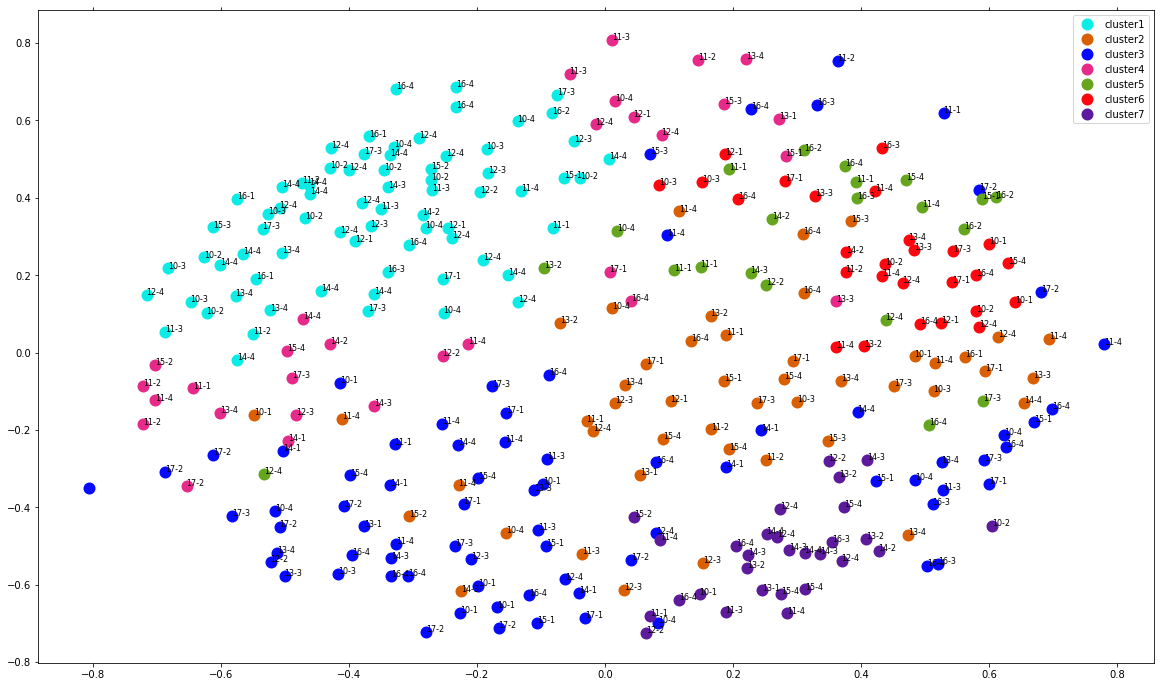

In [48]:
#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(20, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['vol'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
# plt.savefig('gni_clusters_small_noaxes.png', dpi=200)

In [49]:
plt.close()

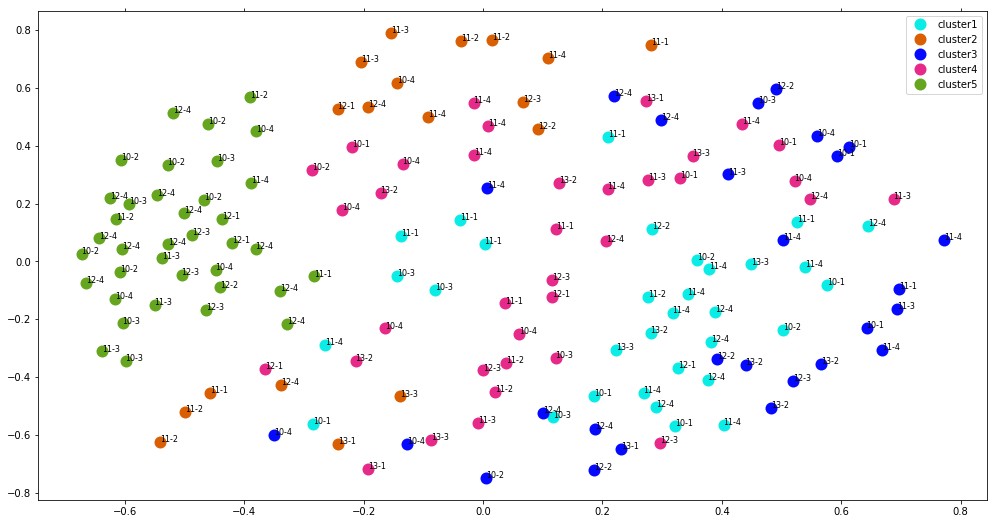

In [50]:
groups1 = df1.groupby('label')

# set up plot
fig, ax1 = plt.subplots(figsize=(17, 9)) # set size
ax1.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups1:
    ax1.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names1[name], color=cluster_colors1[name], mec='none')
    ax1.set_aspect('auto')
    ax1.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax1.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax1.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df1)):
    ax1.text(df1.loc[i]['x'], df1.loc[i]['y'], df1.loc[i]['vol'], size=8)  

    
    
plt.show() #show the plot

In [51]:
plt.close()

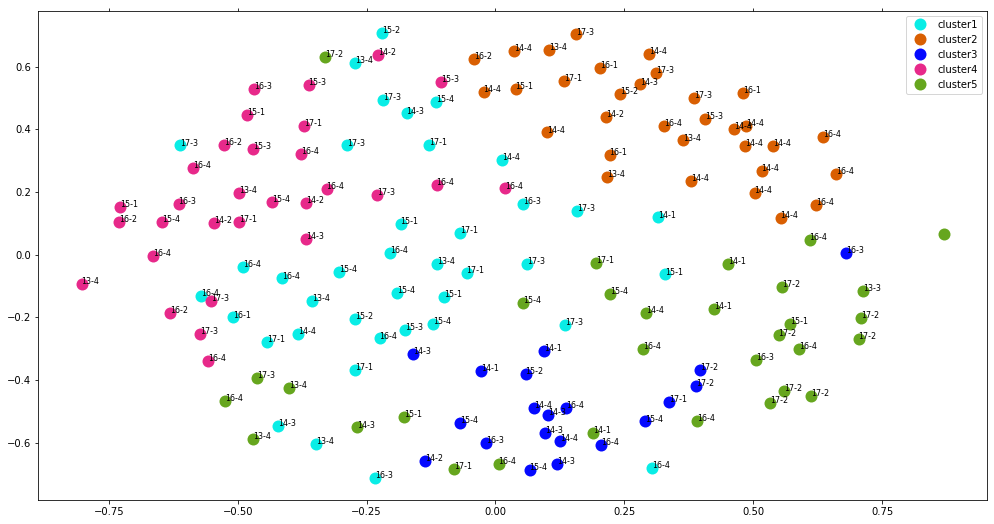

In [52]:
groups2 = df2.groupby('label')

# set up plot
fig, ax2 = plt.subplots(figsize=(17, 9)) # set size
ax2.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups2:
    ax2.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names2[name], color=cluster_colors2[name], mec='none')
    ax2.set_aspect('auto')
    ax2.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax2.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax2.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df2)):
    ax2.text(df2.loc[i]['x'], df2.loc[i]['y'], df2.loc[i]['vol'], size=8)  

    
    
plt.show() #show the plot

In [53]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

### First (302개 논문)

In [54]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

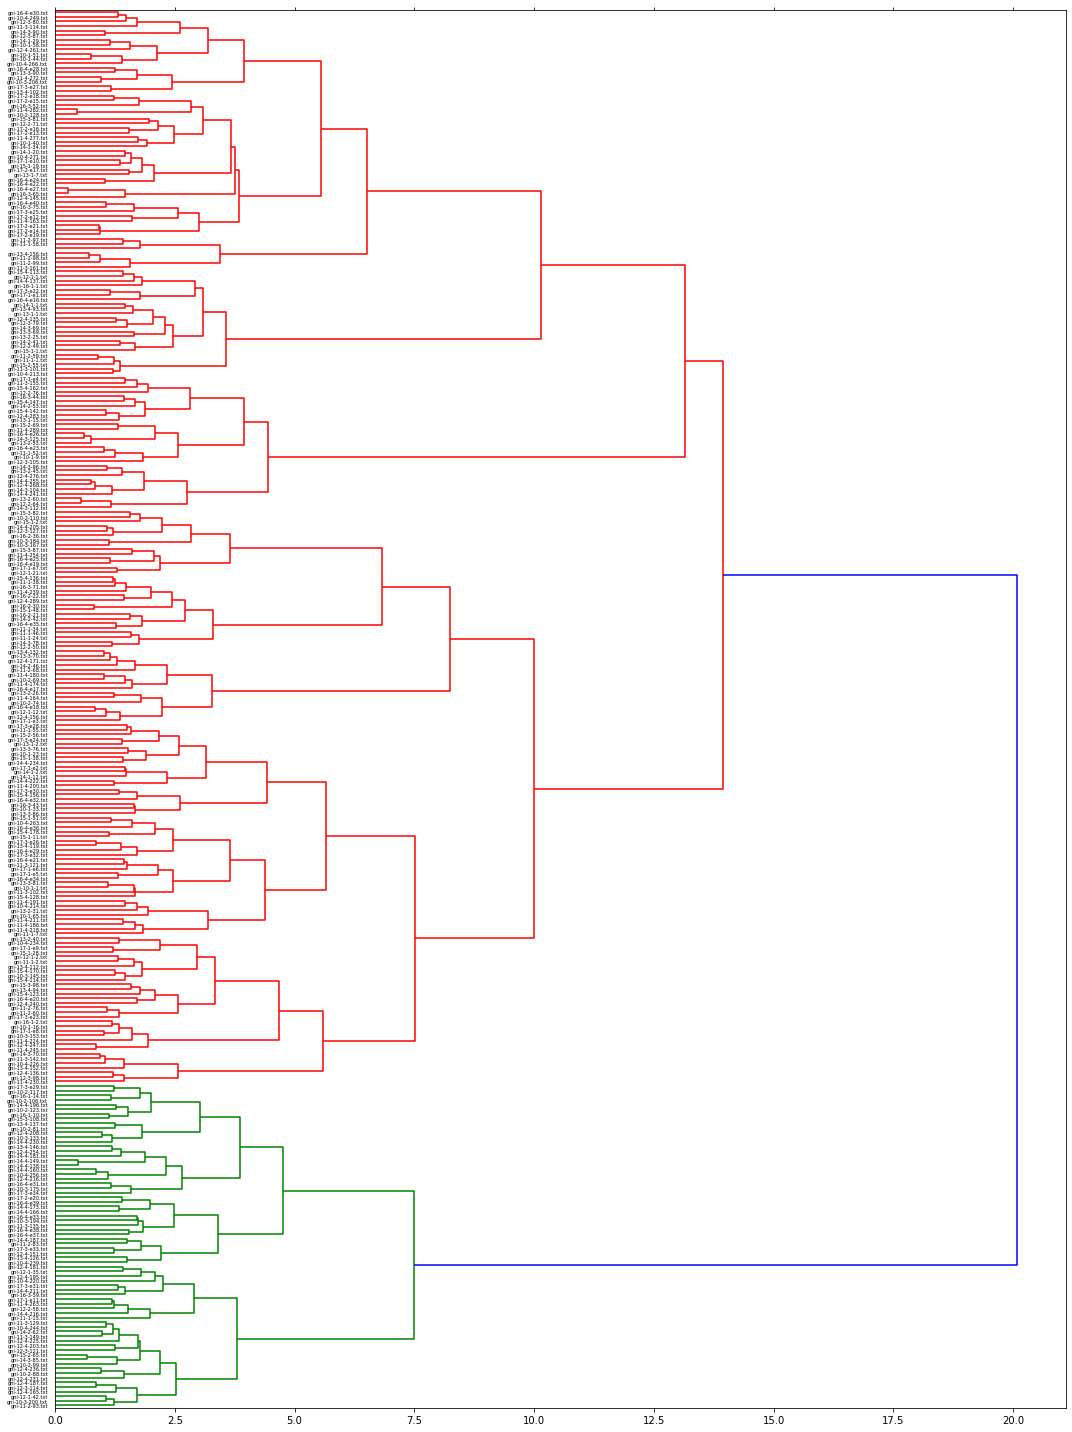

In [55]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('gni_clusters.png', dpi=200) #save figure as ward_clusters

In [56]:
plt.close()

### Second (150개 논문)

In [57]:
df1 = pd.DataFrame(dict(x=xs1, y=ys1, label=clusters1, title=titles1)) 
groups1 = df1.groupby('label')

# Plot 
fig, ax1 = plt.subplots(figsize=(14,6)) #set plot size
ax1.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups1:
    points = ax1.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names1[name], mec='none', color=cluster_colors1[name])
    ax1.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)

    
ax1.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

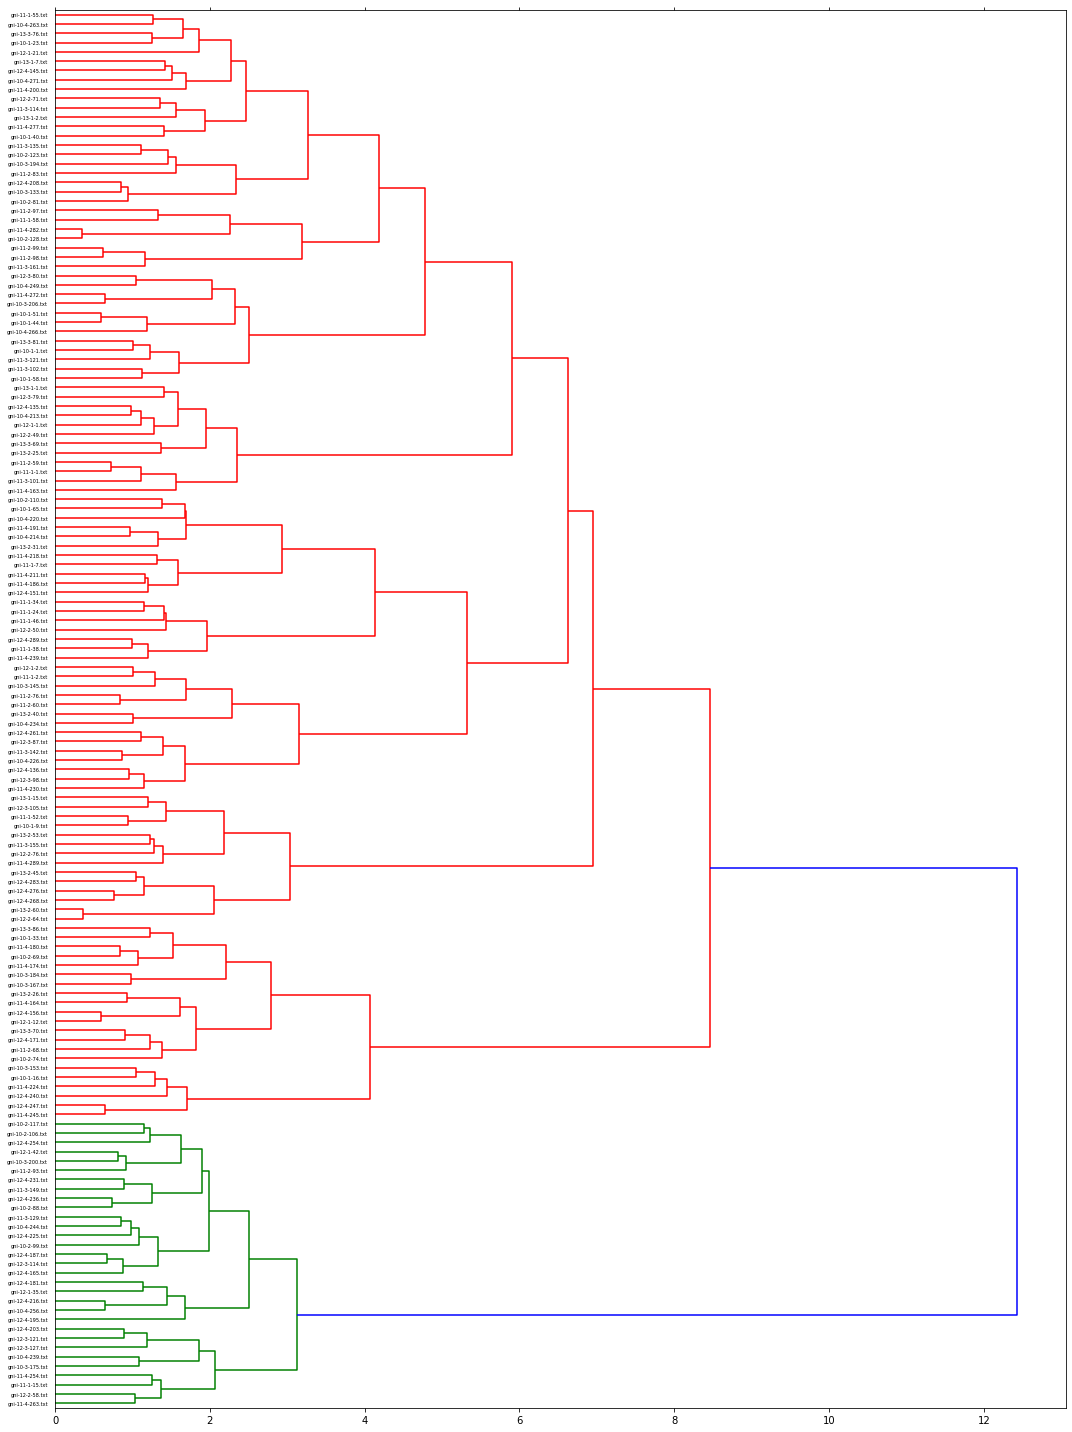

In [58]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix1 = ward(dist1) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax1 = plt.subplots(figsize=(15, 20)) # set size
ax1 = dendrogram(linkage_matrix1, orientation="right", labels=titles1);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('gni_clusters1.png', dpi=200) #save figure as ward_clusters

In [59]:
plt.close()

### Third (152개 논문)

In [60]:
df2 = pd.DataFrame(dict(x=xs2, y=ys2, label=clusters2, title=titles2)) 
groups2 = df2.groupby('label')

# Plot 
fig, ax2 = plt.subplots(figsize=(14,6)) #set plot size
ax2.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups2:
    points = ax2.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names2[name], mec='none', color=cluster_colors2[name])
    ax2.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)

    
ax2.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

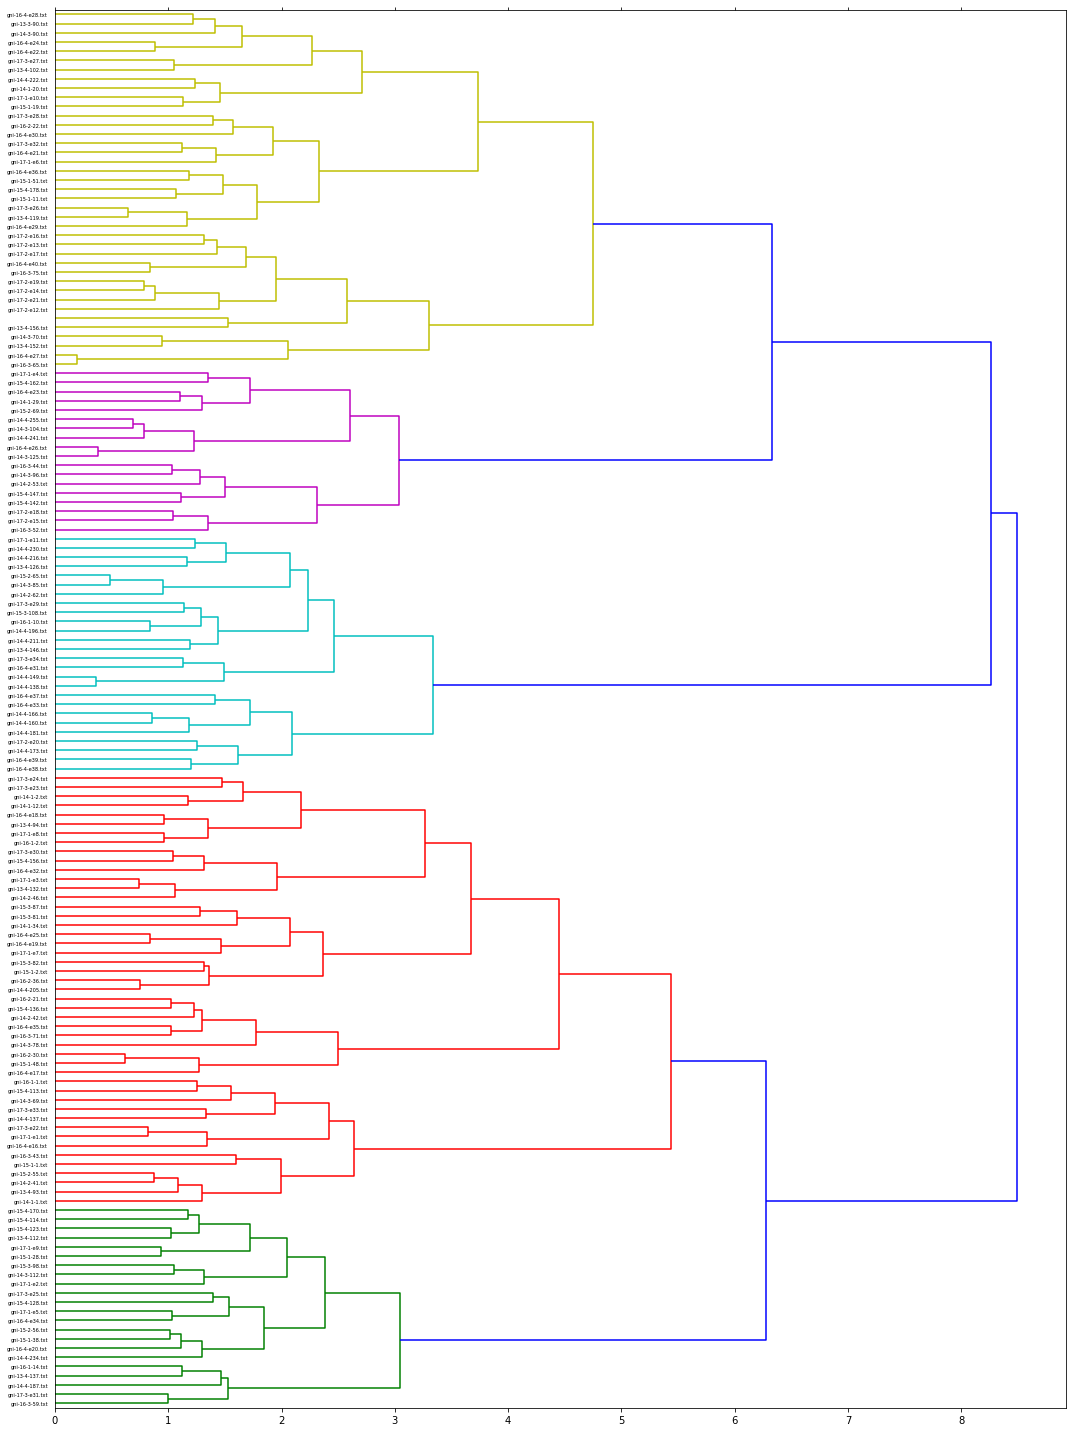

In [61]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix2 = ward(dist2) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax2 = plt.subplots(figsize=(15, 20)) # set size
ax2 = dendrogram(linkage_matrix2, orientation="right", labels=titles2);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('gni_clusters2.png', dpi=200) #save figure as ward_clusters

In [62]:
plt.close()